In [49]:
!pip install -U finance-datareader

In [50]:
#KOSPI에 계절성이 존재하는가? KOSPI에 매수하기 좋은 달과 매도하기 좋은 달이 있을까? 
# 4월에 매수하기 좋고 9월에 매도하기 좋다는데 월별 추이가 맞을까? 라는 의문을 해결하기 위한 작업입니다.
# 과연 KOSPI는 월별로 어떻게 수익률의 차이를 보이는지 알아보시죠!

#데이터 수집을 위한 FinaceDataReader, 데이터 분석을 위한 pandas, 시각화를 위한 matplotlib.pyplot
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# 2010년부터 2019년까지 KOSPI data를 수집합니다.
# outlier 제거를 위하여 코로나 19가 주식시장에 영향을 미치기 전인 2019년까지의 데이터를 활용했습니다.
df = fdr.DataReader('KS11', '2010-12-01','2019-12-31') # 코스피
df.shape

(2238, 6)

In [71]:
# 수집하는 데이터의 일별 시세 미리보기 (첫부분)
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-12-01,1929.32,1907.70,1929.32,1904.71,339160000.0,0.0130
2010-12-02,1950.26,1943.71,1950.26,1940.23,439000000.0,0.0109
2010-12-03,1957.26,1960.61,1960.61,1948.51,438580000.0,0.0036
2010-12-06,1953.64,1961.23,1961.47,1946.35,460280000.0,-0.0018
2010-12-07,1962.52,1955.63,1964.64,1952.56,639160000.0,0.0045


In [72]:
# 수집하는 데이터의 일별 시세 미리보기 (뒷부분)
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,2203.71,2208.22,2209.20,2196.43,502030000.0,-0.0002
2019-12-24,2190.08,2206.23,2206.23,2187.58,569970000.0,-0.0062
2019-12-26,2197.93,2192.22,2198.01,2183.90,571310000.0,0.0036
2019-12-27,2204.21,2183.70,2215.55,2177.40,490170000.0,0.0029
2019-12-30,2197.67,2202.62,2208.04,2195.65,416400000.0,-0.0030


In [86]:
# 2011년~2019년까지 월별로 월평균을 구합니다.
df["Close"].resample("M").mean()

Date
2010-12-31    2002.504091
2011-01-31    2091.610000
2011-02-28    2002.869412
2011-03-31    2002.669091
2011-04-30    2153.132381
                 ...     
2019-08-31    1944.237619
2019-09-30    2045.205263
2019-10-31    2065.747619
2019-11-30    2128.794762
2019-12-31    2147.013500
Freq: M, Name: Close, Length: 109, dtype: float64

<AxesSubplot:xlabel='Date'>

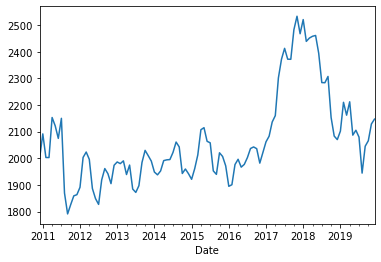

In [74]:
# 앞서 구한 월평균값을 차트로 시각화합니다.
df["Close"].resample("M").mean().plot()

In [75]:
# 직전달과 이번 달의 차이를 통해 수익률을 산출합니다.
df["Close"].resample("M").mean().diff()

Date
2010-12-31           NaN
2011-01-31     89.105909
2011-02-28    -88.740588
2011-03-31     -0.200321
2011-04-30    150.463290
                 ...    
2019-08-31   -135.242381
2019-09-30    100.967644
2019-10-31     20.542356
2019-11-30     63.047143
2019-12-31     18.218738
Freq: M, Name: Close, Length: 109, dtype: float64

In [76]:
def first_day(entry):
    return entry[0]

beginning_price = "Close".resample('M').apply(first_day)

AttributeError: 'str' object has no attribute 'resample'

In [77]:
# 앞서 구해진 값을 percent change라는 함수를 통해 percent로 변환해줍니다.
df["Close"].resample("M").median().pct_change()

Date
2010-12-31         NaN
2011-01-31    0.037231
2011-02-28   -0.039754
2011-03-31   -0.003194
2011-04-30    0.069451
                ...   
2019-08-31   -0.068386
2019-09-30    0.063055
2019-10-31    0.004946
2019-11-30    0.026747
2019-12-31    0.019433
Freq: M, Name: Close, Length: 109, dtype: float64

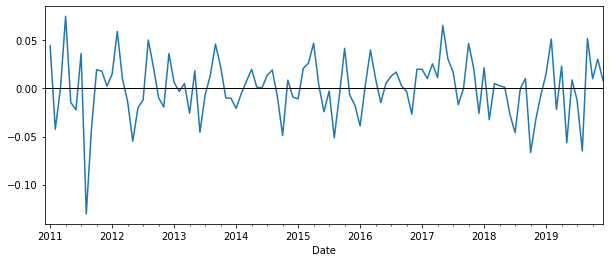

In [87]:
# 원별 변화량의 평균을 percent로 변환하고 시각화합니다.
month_change =  df["Close"].resample("M").mean().pct_change()
month_change.plot(figsize=(10, 4))
plt.axhline(0, c="k", lw=1)

([<matplotlib.axis.XTick at 0x25d8f651cd0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

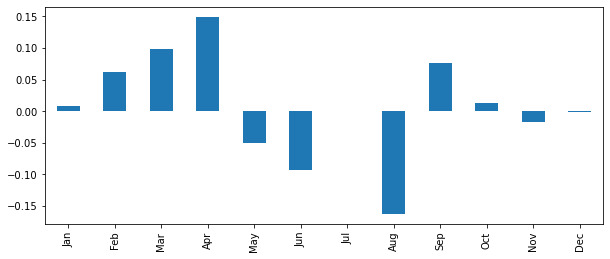

In [90]:
# 앞서 구한 값을 막대형 차트로 시각화 합니다.
sum_monthly_change.plot(kind="bar", figsize=(10, 4))
# 각 월마다 1월~12월까지의 명칭을 붙여줍니다. (일일이 수작업으로, 한글 인식이 안되므로 영어로)
plt.xticks(range(0,12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [80]:
# 월별 평균 수익률 계산을 위해 음수를 제거해야 하고, 이에 따라 임시로 1을 더해줍니다.
percent_month_change = month_change + 1
percent_month_change

Date
2010-12-31         NaN
2011-01-31    1.044497
2011-02-28    0.957573
2011-03-31    0.999900
2011-04-30    1.075131
                ...   
2019-08-31    0.934963
2019-09-30    1.051932
2019-10-31    1.010044
2019-11-30    1.030520
2019-12-31    1.008558
Freq: M, Name: Close, Length: 109, dtype: float64

In [81]:
# 구해진 각 월의 수익률을 월별로 곱하여 10년간 월평균 수익률을 계산합니다.
multiplied_monthly_change = percent_month_change.groupby([lambda x: x.month]).prod()
multiplied_monthly_change

1     1.050445
2     1.058514
3     1.100937
4     1.156017
5     0.945364
6     0.907710
7     0.998041
8     0.836653
9     1.074774
10    1.006411
11    0.980687
12    0.996786
Name: Close, dtype: float64

([<matplotlib.axis.XTick at 0x25d8f2b2130>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

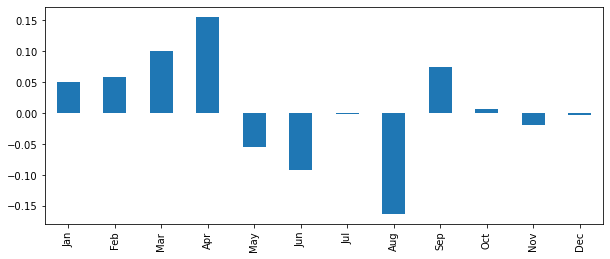

In [82]:
# 월펼 평균 수익률을 막대형 차트로 시각화합니다.
multiplied_monthly_change_plot = multiplied_monthly_change - 1
multiplied_monthly_change_plot.plot(kind="bar", figsize=(10, 4))
# 역시나 이름은 수작업으로 붙여줍니다.
plt.xticks(range(0,12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# 평균적으로 4월의 수익률이 제일 높고 8월의 수익률이 가장 안 좋은 것을 확인할 수 있습니다.
# 눈에 띄는 점은 4월과 5월 / 8월과 9월의 대비되는 평균 수익률입니다.